In [10]:
# %%
# mWER Statistical Analysis: Grouping, Visualization, Regression, and Diagnostics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.stats.api as sms
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [31]:
# 1) Load mWER data
df_mwer = pd.read_csv("transcripts_wer_mwer_phrase.csv")

# 2) Group by Technology & Model: compute descriptive stats for mwer
grouped = df_mwer.groupby(["technology", "model"])['mwer']
stats_df = grouped.agg(["mean", "median", "std", "min", "max"]).reset_index()
print("=== mWER by Technology & Model ===")
print(stats_df)
# Save to CSV
stats_df.to_csv("mwer_stats_by_model.csv", index=False)

=== mWER by Technology & Model ===
   technology                 model      mean    median       std       min  \
0      recapp       gsw-CH_smoothed  0.088482  0.067961  0.075656  0.000000   
1        vosk    vosk-model-de-0.21  0.171188  0.114583  0.143222  0.000000   
2     whisper                 large  0.123852  0.105882  0.079535  0.000000   
3     whisper                medium  0.128254  0.102564  0.095921  0.007194   
4     whisper                 turbo  0.114427  0.087500  0.094470  0.000000   
5  whisper_v2  whisper_rescuespeech  0.432577  0.428571  0.069981  0.247423   

        max  
0  0.516854  
1  0.687500  
2  0.514563  
3  0.681818  
4  0.626374  
5  0.688312  


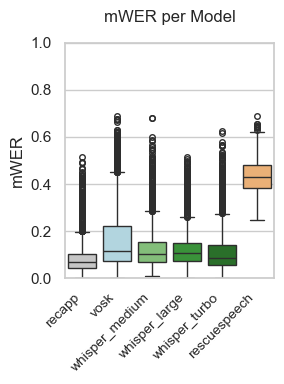

Plot saved at: results_for_paper/mwer_boxplot.png


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Load mWER data
df_mwer = pd.read_csv("transcripts_wer_mwer_phrase.csv")

# 2) Prepare for boxplot
df = df_mwer.copy()
df['system'] = df['technology'] + '–' + df['model']

label_map = {
    'recapp–gsw-CH_smoothed':         'recapp',
    'vosk–vosk-model-de-0.21':         'vosk',
    'whisper–medium':                  'whisper_medium',
    'whisper–large':                   'whisper_large',
    'whisper–turbo':                   'whisper_turbo',
    'whisper_v2–whisper_rescuespeech': 'rescuespeech'
}
df['label'] = df['system'].map(label_map)

order = [lbl for lbl in label_map.values() if lbl in df['label'].unique()]
palette = {
    'recapp':         '#c6c6c6',
    'vosk':           '#aad9e6',
    'whisper_medium': '#7bc96f',
    'whisper_large':  '#2ca02c',
    'whisper_turbo':  '#1f7a1f',
    'rescuespeech':   '#fdb064'
}
flierprops = dict(marker='o', color='black', markersize=4)

# 3) Plotting
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(3, 4))
ax = sns.boxplot(
    data=df,
    x='label',
    y='mwer',
    order=order,
    palette=palette,
    flierprops=flierprops
)

ax.set_title('mWER per Model', pad=15)
ax.set_xlabel('')
ax.set_ylabel('mWER')

# Einheitliche Y‑Skala von 0 bis 1
ax.set_ylim(0, 1)
# Falls invertiert gewünscht, statt (0,1) → (1,0)

plt.xticks(rotation=45, ha='right', fontsize=10)

# 4) Save
output_dir = os.path.join(os.path.dirname("transcripts_wer_mwer_phrase.csv"), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "mwer_boxplot.png")

plt.tight_layout()
plt.savefig(output_png, format="png", dpi=300)
plt.show()

print(f"Plot saved at: {output_png}")



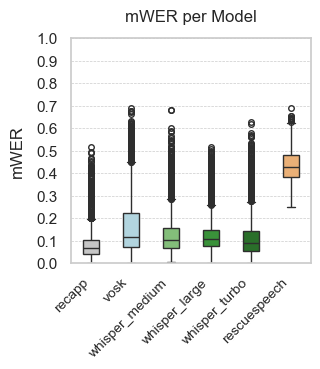

Plot saved at: results_for_paper/mwer_boxplot_fixed.png


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Load mWER data
csv_file = "transcripts_wer_mwer_phrase.csv"
df_mwer = pd.read_csv(csv_file)
df = df_mwer.copy()
df["system"] = df["technology"] + "–" + df["model"]

# 2) Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben
order = [lbl for lbl in ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
         if lbl in df["label"].unique()]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}
flierprops = dict(marker='o', color='black', markersize=4)

# 4) Plot‑Style
sns.set(style="whitegrid", font_scale=1.0)

# 5) Figure & Axes absolut setzen (wie bei WER-Plot und TF‑IDF)
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0.12, 0.18, 0.80, 0.75])

# 6) Boxplot zeichnen
sns.boxplot(
    data=df,
    x="label", y="mwer",
    order=order, palette=palette,
    flierprops=flierprops,
    ax=ax,
    width=0.4
)

# 7) Titel, Achsenbeschriftungen & fixe Y‑Skala
ax.set_title("mWER per Model", pad=12)
ax.set_xlabel("")
ax.set_ylabel("mWER", labelpad=8)
ax.set_ylim(0, 1)

# 8) Einheitliche Grid‑Linien
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(axis="y", which="major", linestyle="--", linewidth=0.5)

# 9) X‑Ticks rotieren
ax.set_xticklabels(order, rotation=45, ha="right", fontsize=10)

# 10) Ergebnis‑Ordner & Speichern
output_dir = os.path.join(os.path.dirname(csv_file), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "mwer_boxplot_fixed.png")

# 11) Speichern mit tight bbox
fig.savefig(output_png, format="png", dpi=300, bbox_inches='tight', pad_inches=0.1)

# 12) Anzeige & Pfad
plt.show()
print(f"Plot saved at: {output_png}")


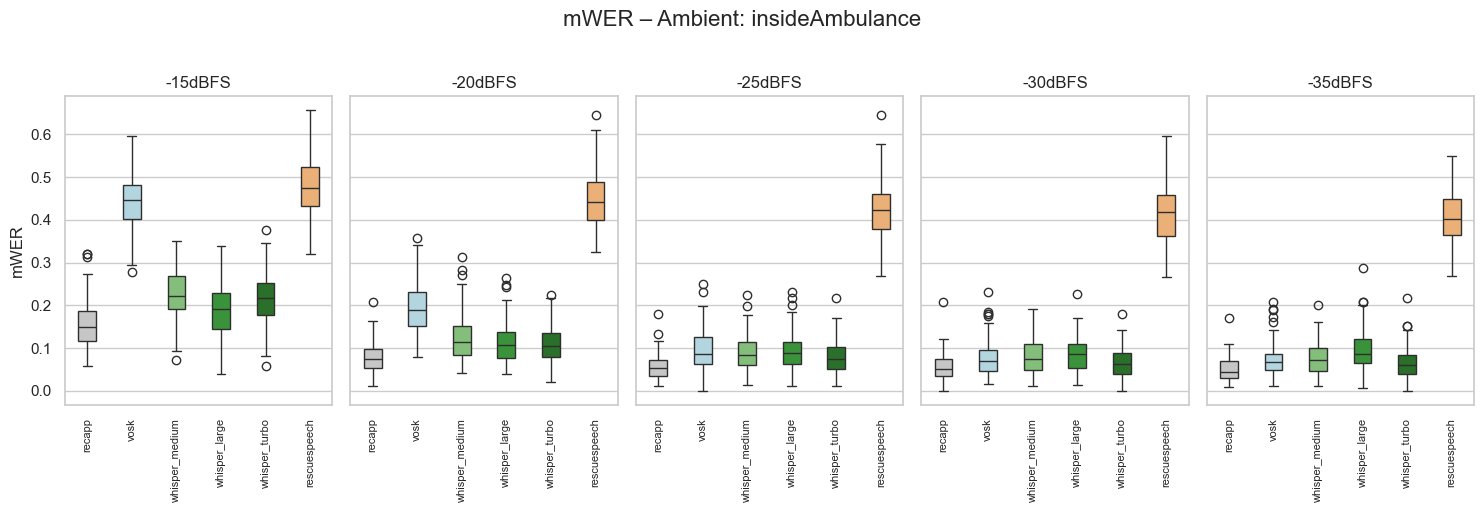

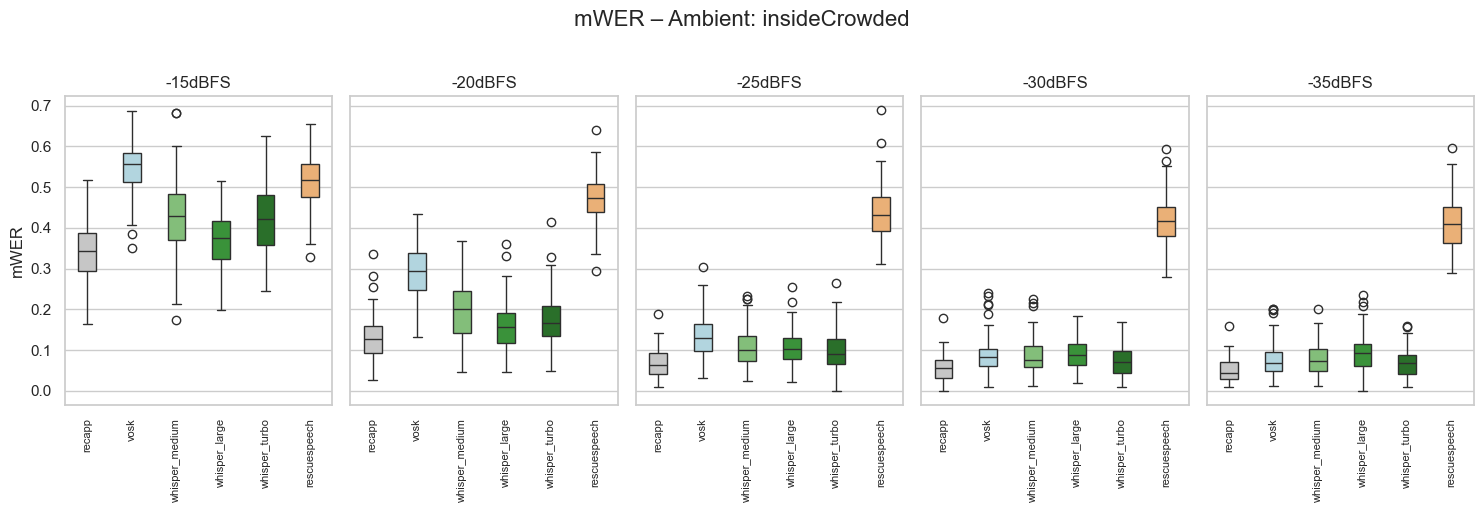

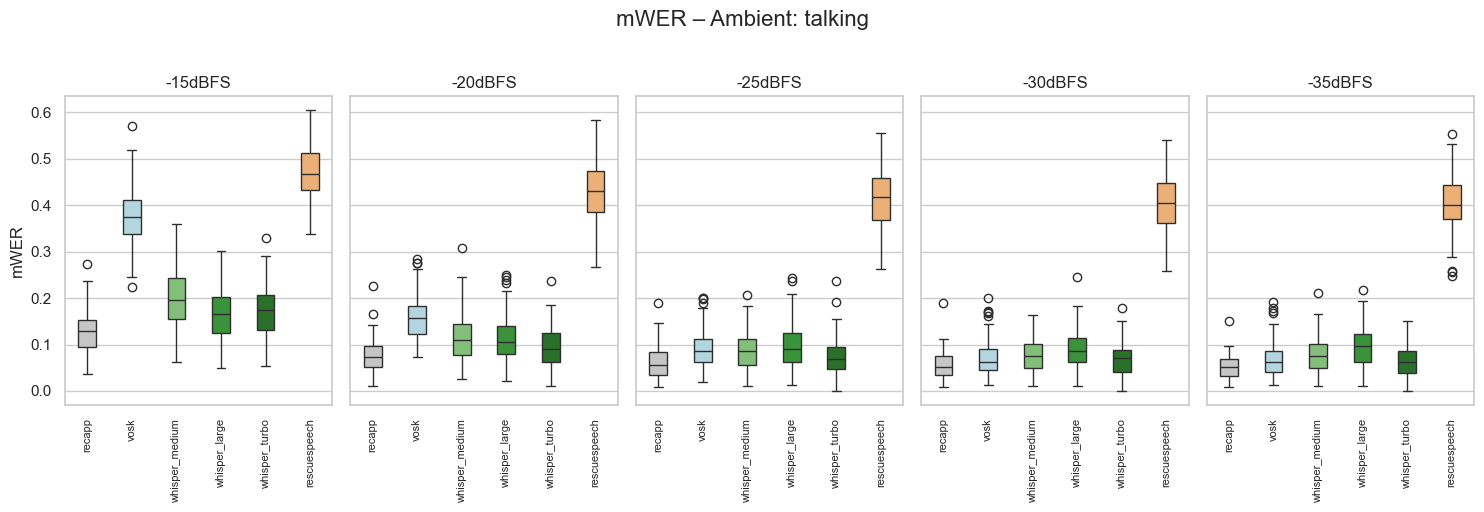

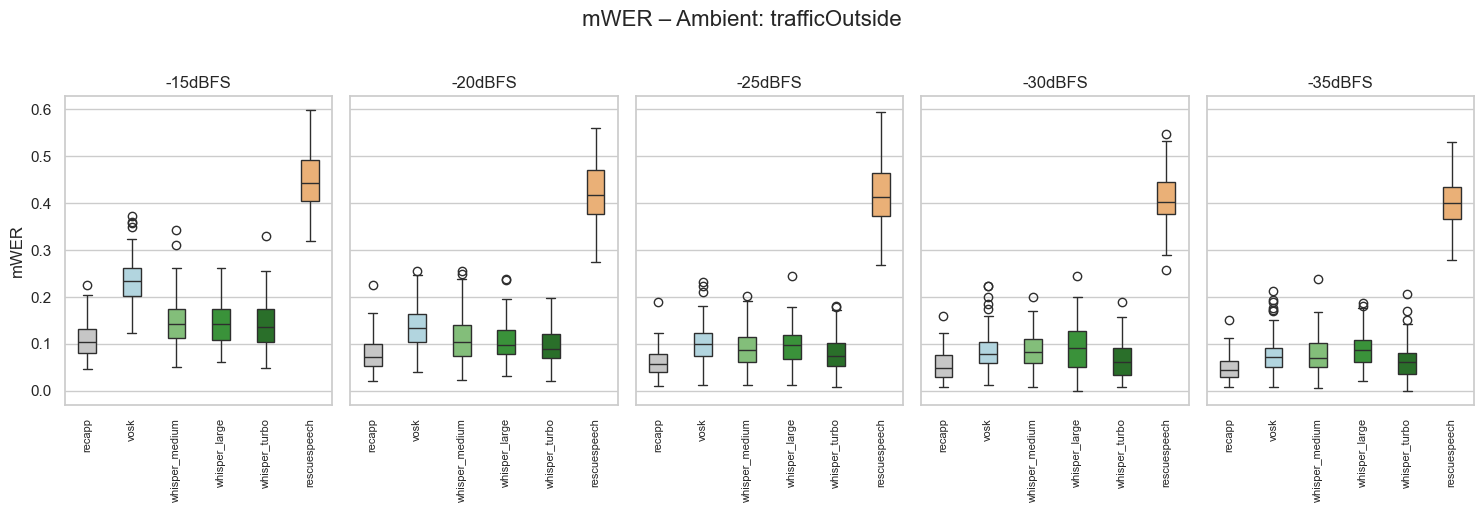

In [13]:
# 4) Boxplots by System, Volume & Ambient
df['ambientVariant'] = df_mwer['ambientVariant']
df['processedVolume'] = df_mwer['processedVolume']
volumes = sorted(df['processedVolume'].unique())

for amb in sorted(df['ambientVariant'].unique()):
    subset = df[df['ambientVariant'] == amb]
    fig, axes = plt.subplots(1, len(volumes), figsize=(len(volumes)*3, 5), sharey=True)
    fig.suptitle(f"mWER – Ambient: {amb}", fontsize=16, y=1.02)
    for i, vol in enumerate(volumes):
        ax = axes[i]
        sub = subset[subset['processedVolume'] == vol]
        sns.boxplot(data=sub, x='label', y='mwer', order=order, palette=palette, ax=ax, width=0.4)
        ax.set_title(vol)
        ax.set_xlabel('')
        if i == 0:
            ax.set_ylabel('mWER')
        else:
            ax.set_ylabel('')
        ax.set_xticklabels(order, rotation=90, ha='center', fontsize=8)
    plt.tight_layout()
    plt.show()

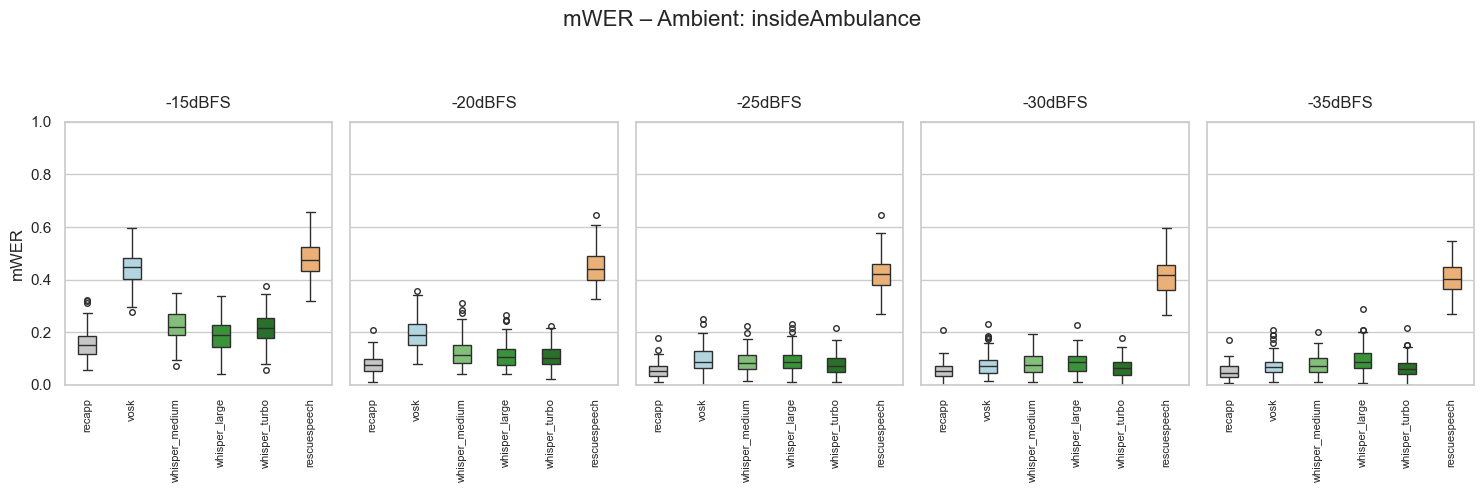

Plot saved at: results_for_paper/mwer_boxplot_insideAmbulance.png


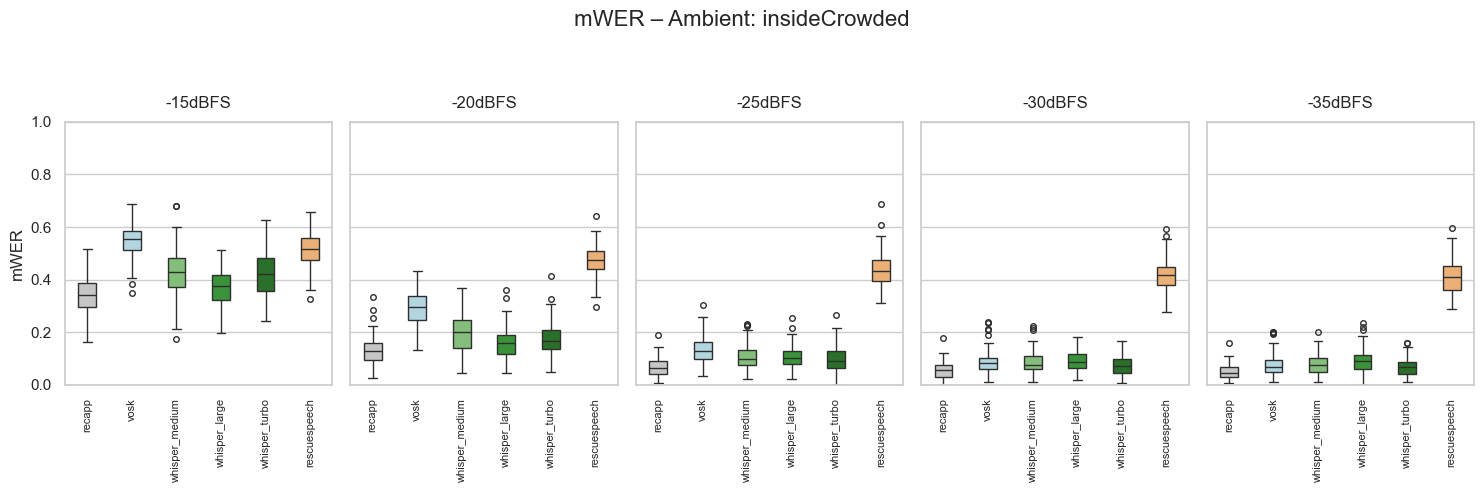

Plot saved at: results_for_paper/mwer_boxplot_insideCrowded.png


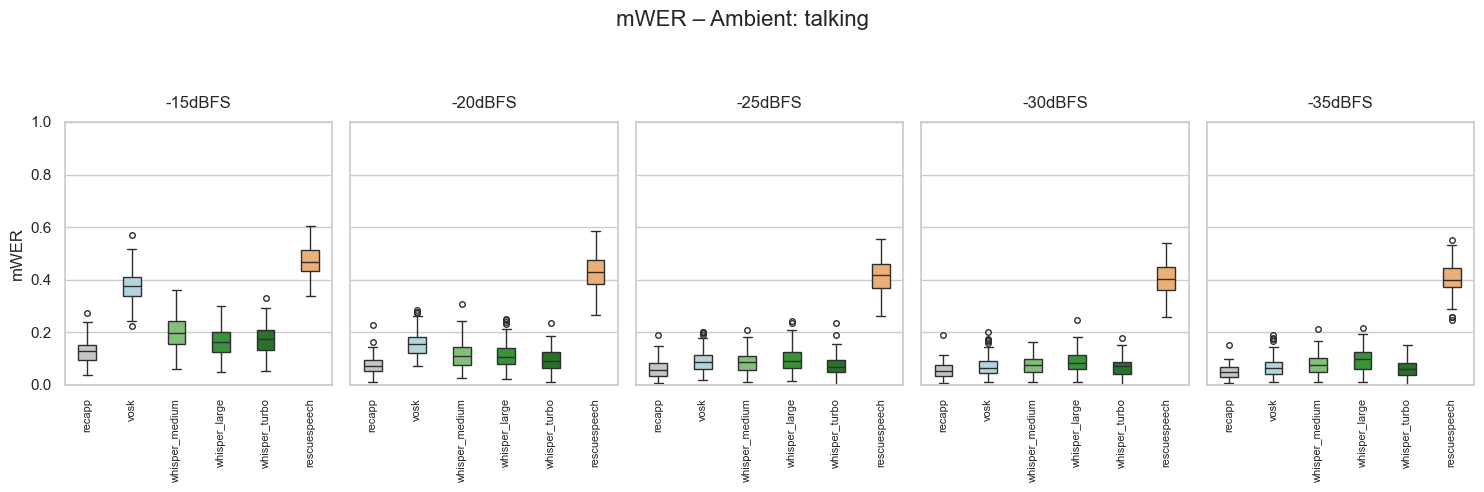

Plot saved at: results_for_paper/mwer_boxplot_talking.png


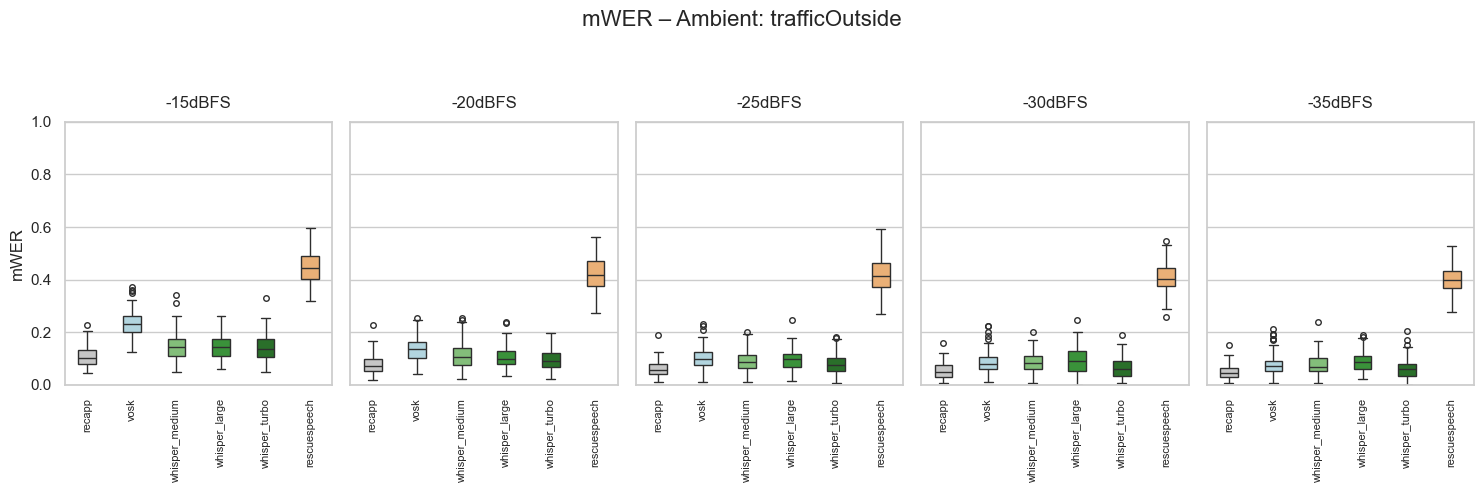

Plot saved at: results_for_paper/mwer_boxplot_trafficOutside.png


In [46]:
# 4) Boxplots by System, Volume & Ambient mit fester Y‑Achse
df['ambientVariant'] = df_mwer['ambientVariant']
df['processedVolume'] = df_mwer['processedVolume']
volumes = sorted(df['processedVolume'].unique())

# Ordner für Ergebnisse erstellen, falls er noch nicht existiert
output_dir = os.path.join(os.path.dirname("transcripts_wer_mwer_phrase.csv"), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)

# Schleife durch die 'ambientVariant'-Werte
for amb in sorted(df['ambientVariant'].unique()):
    subset = df[df['ambientVariant'] == amb]
    if subset.empty:
        continue

    fig, axes = plt.subplots(1, len(volumes), figsize=(len(volumes)*3, 5), sharey=True)

    for i, vol in enumerate(volumes):
        ax = axes[i]
        sub = subset[subset['processedVolume'] == vol]

        # Boxplot erstellen
        sns.boxplot(
            data=sub,
            x='label', y='mwer',
            order=order, palette=palette,
            ax=ax, width=0.4, flierprops=flierprops
        )

        # Titel und Achsen anpassen
        ax.set_title(vol, pad=10)
        ax.set_xlabel('')
        if i == 0:
            ax.set_ylabel('mWER')
        else:
            ax.set_ylabel('')
        ax.set_xticklabels(order, rotation=90, ha='center', fontsize=8)

        # **Feste Y‑Achse von 0 bis 1**
        ax.set_ylim(0, 1)

    # Supertitel hinzufügen
    fig.suptitle(f"mWER – Ambient: {amb}", fontsize=16)

    # Layout so anpassen, dass der Titel nicht abgeschnitten wird
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    # Plot als PNG speichern
    output_png = os.path.join(output_dir, f"mwer_boxplot_{amb}.png")
    fig.savefig(output_png, format="png", dpi=300)

    # Plot anzeigen und Pfad ausgeben
    plt.show()
    print(f"Plot saved at: {output_png}")


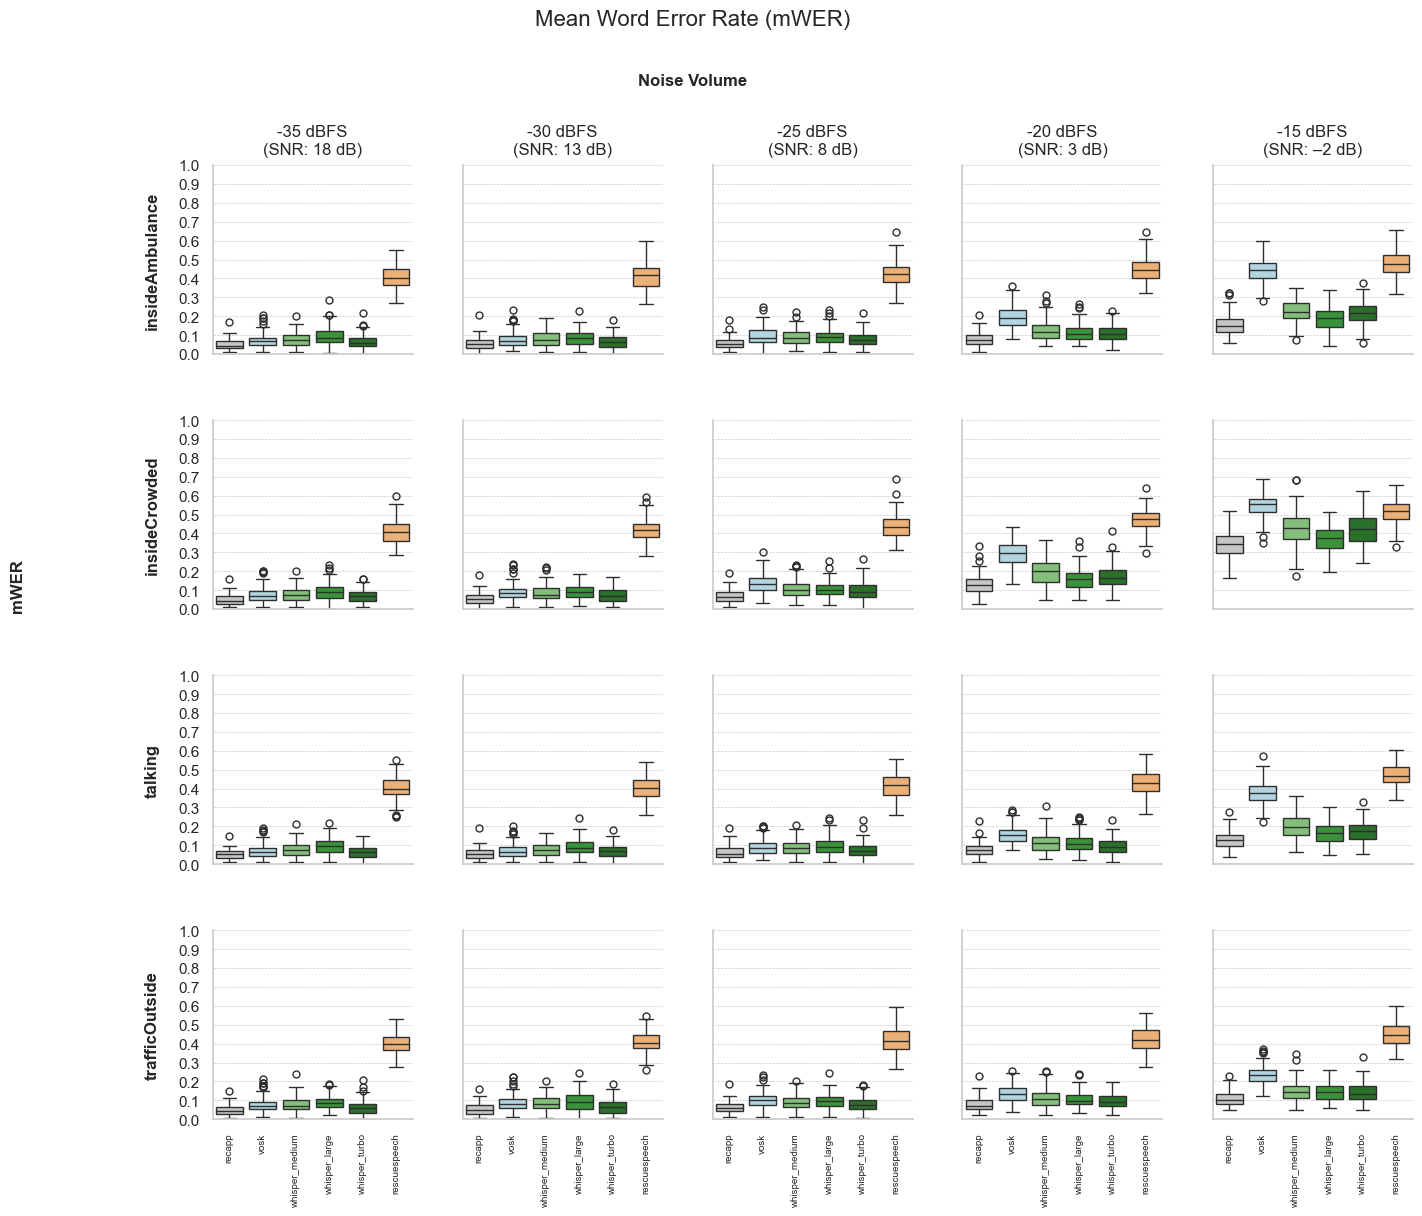

Plot saved at: results_for_paper/mwer_facetgrid.png


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Daten laden
csv_scores = "transcripts_wer_mwer_phrase.csv"  # dein df_mwer-CSV
df_mwer = pd.read_csv(csv_scores)
df = df_mwer.copy()
df["system"] = df["technology"] + "–" + df["model"]

# 2) Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben übernehmen
order = ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# 4) Fest definierte dBFS- & Ambient-Varianten
volumes = ["-35dBFS","-30dBFS","-25dBFS","-20dBFS","-15dBFS"]
vol_labels = {
    "-35dBFS": "-35 dBFS\n(SNR: 18 dB)",
    "-30dBFS": "-30 dBFS\n(SNR: 13 dB)",
    "-25dBFS": "-25 dBFS\n(SNR: 8 dB)",
    "-20dBFS": "-20 dBFS\n(SNR: 3 dB)",
    "-15dBFS": "-15 dBFS\n(SNR: –2 dB)"
}
ambients = sorted(df["ambientVariant"].unique())

sns.set(style="whitegrid", font_scale=1.0)

# 5) FacetGrid erstellen
g = sns.catplot(
    data=df,
    x="label", y="mwer",
    row="ambientVariant", col="processedVolume",
    kind="box",
    order=order, palette=palette,
    height=3, aspect=1,
    sharey=True, margin_titles=True, legend=False,
    col_order=volumes,
    row_order=ambients
)

# 6) Default-Titles entfernen
g.set_titles(row_template="", col_template="")

# 7) Abstände & Supertitel setzen
g.fig.subplots_adjust(
    top=0.85,   # Platz für Haupttitel + Volume-Label
    left=0.18,  # Platz für Ambient-Labels
    right=0.98,
    hspace=0.35,
    wspace=0.25
)
g.fig.suptitle("Mean Word Error Rate (mWER)", fontsize=16)

# 8) Noise Volume-Label oberhalb der Columns
g.fig.text(
    0.50, 0.92,
    "Noise Volume",
    ha="center", va="center",
    fontsize=12, fontweight="bold"
)

# 9) Manuelle Column-Titles mit SNR
for idx, vol in enumerate(volumes):
    ax = g.axes[0][idx]
    ax.set_title(vol_labels[vol], pad=8)

# 10) Feintuning jeder Facet-Achse
for row_idx, amb in enumerate(ambients):
    for col_idx, vol in enumerate(volumes):
        ax = g.axes[row_idx][col_idx]
        ax.set_ylim(0, 1)
        ax.yaxis.set_major_locator(MultipleLocator(0.1))
        ax.grid(axis="y", which="major", linestyle="--", linewidth=0.5)
        ax.set_xticklabels(order, rotation=90, ha="center", fontsize=7)
        ax.set_xlabel("")  # kein X-Label
        ax.set_ylabel("")  # kein Y-Label in jedem Facet

    # Ambient-Label links außen
    ax0 = g.axes[row_idx][0]
    ax0.text(
        -0.30, 0.5, amb,
        ha="center", va="center",
        rotation=90, transform=ax0.transAxes,
        fontsize=12, fontweight="bold"
    )

# 11) Ein einziges Y‑Achsen-Label ganz links
g.fig.text(
    0.05, 0.5,
    "mWER",
    ha="center", va="center",
    rotation="vertical",
    fontsize=12, fontweight="bold"
)

# 12) Ergebnis-Ordner anlegen & speichern
output_dir = os.path.join(os.path.dirname(csv_scores), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "mwer_facetgrid.png")
g.fig.savefig(output_png, format="png", dpi=300)

# 13) Plot anzeigen & Pfad ausgeben
plt.show()
print(f"Plot saved at: {output_png}")


In [27]:
# 5) OLS Regression with Cluster-Robust SEs for mWER
# 5.1) Factor baselines
sys_levels = list(df['system'].unique())
if 'recapp–gsw-CH_smoothed' in sys_levels:
    sys_levels.remove('recapp–gsw-CH_smoothed')
    sys_levels = ['recapp–gsw-CH_smoothed'] + sys_levels
    df['system'] = pd.Categorical(df['system'], categories=sys_levels)

av_levels = list(df['ambientVariant'].unique())
if 'trafficOutside' in av_levels:
    av_levels.remove('trafficOutside')
    av_levels = ['trafficOutside'] + av_levels
    df['ambientVariant'] = pd.Categorical(df['ambientVariant'], categories=av_levels)

pv_levels = list(df['processedVolume'].unique())
if '-35dBFS' in pv_levels:
    pv_levels.remove('-35dBFS')
    pv_levels = ['-35dBFS'] + pv_levels
    df['processedVolume'] = pd.Categorical(df['processedVolume'], categories=pv_levels)

# 5.2) Fit model
formula = 'mwer ~ C(system) + C(ambientVariant) + C(processedVolume)'
ols = smf.ols(formula, data=df).fit()
ols_clust = ols.get_robustcov_results(cov_type='cluster', groups=df['convoID'])
print('=== mWER OLS Regression (cluster-robust SE) ===')
print(ols_clust.summary())

=== mWER OLS Regression (cluster-robust SE) ===
                            OLS Regression Results                            
Dep. Variable:                   mwer   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     705.6
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.19e-89
Time:                        11:24:28   Log-Likelihood:                 14980.
No. Observations:               11880   AIC:                        -2.993e+04
Df Residuals:                   11867   BIC:                        -2.984e+04
Df Model:                          12                                         
Covariance Type:              cluster                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

=== Variance Inflation Factors (VIF) ===
                                  variable       VIF
0                     system_whisper–large  0.000777
1                    system_whisper–medium  0.000777
2                     system_whisper–turbo  0.000777
3           system_vosk–vosk-model-de-0.21  0.000777
4   system_whisper_v2–whisper_rescuespeech  0.000777
5           ambientVariant_insideAmbulance  0.000570
6             ambientVariant_insideCrowded  0.000570
7                   ambientVariant_talking  0.000570
8                  processedVolume_-15dBFS  0.000680
9                  processedVolume_-20dBFS  0.000680
10                 processedVolume_-25dBFS  0.000680
11                 processedVolume_-30dBFS  0.000680


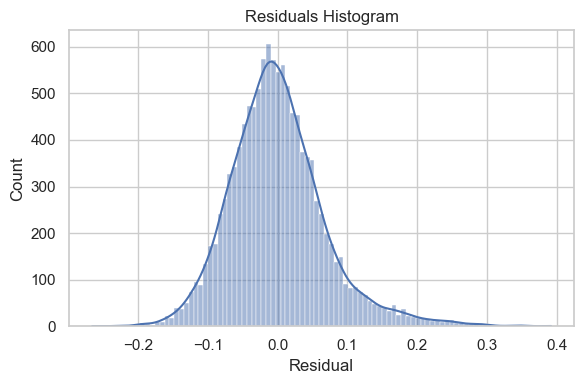

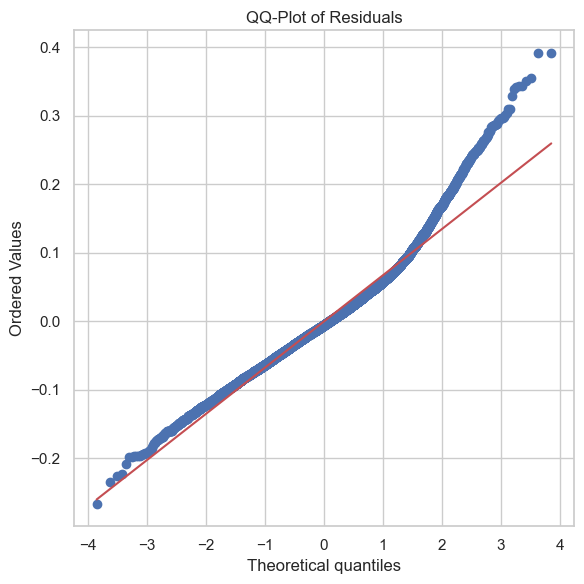

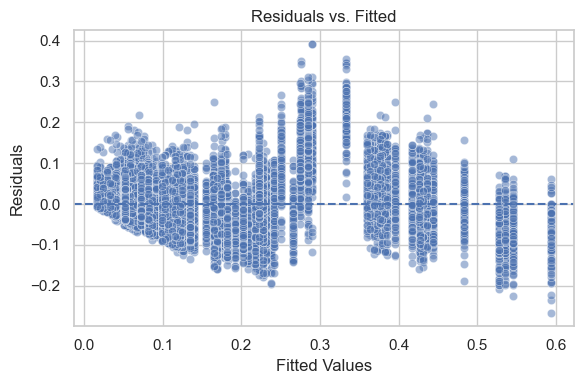

In [28]:
# 6) Multicollinearity Check (VIF)
X = pd.get_dummies(df[['system','ambientVariant','processedVolume']], drop_first=True)
vif_data = pd.DataFrame({'variable': X.columns, 'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})
print('=== Variance Inflation Factors (VIF) ===')
print(vif_data)

# 7) Residual Diagnostics
# Histogram
plt.figure(figsize=(6,4))
sns.histplot(ols_clust.resid, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.tight_layout()
plt.show()

# QQ-Plot using scipy.stats
plt.figure(figsize=(6,6))
stats.probplot(ols_clust.resid, dist='norm', plot=plt)
plt.title('QQ-Plot of Residuals')
plt.tight_layout()
plt.show()

# Residuals vs. Fitted
fitted = ols_clust.fittedvalues
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=ols_clust.resid, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [33]:
# 8) Heteroskedasticity Test (Breusch–Pagan)
bp = sms.het_breuschpagan(ols.resid, ols.model.exog)
labels = ['Lagrange multiplier stat', 'p-value', 'f-value', 'f p-value']
print('=== Breusch–Pagan Test ===')
print(dict(zip(labels, bp)))

=== Breusch–Pagan Test ===
{'Lagrange multiplier stat': 2650.558255278173, 'p-value': 0.0, 'f-value': 284.0021430455985, 'f p-value': 0.0}


In [34]:
df_results = ols_clust.summary_frame()
print(df_results)
from numpy import set_printoptions, inf

set_printoptions(threshold=inf, linewidth=2000)
print(arr)

AttributeError: 'OLSResults' object has no attribute 'summary_frame'

In [35]:
from numpy import set_printoptions, inf

set_printoptions(threshold=inf, linewidth=2000)
print(fitted.max())


0.5939966063818185


In [18]:
print(fitted)

[0.2372553  0.12687466 0.08696601 ... 0.37673528 0.36411275 0.36012037]


# Saving

In [37]:
import os
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# 1) Arbeitsverzeichnis anzeigen (Arbeitsverzeichnis des Notebooks)
current_working_dir = os.getcwd()
print(f"Der Arbeitsordner ist: {current_working_dir}")

# 2) Verzeichnis für den Export erstellen (falls noch nicht vorhanden)
export_dir = os.path.join(current_working_dir, 'results_for_paper/')
os.makedirs(export_dir, exist_ok=True)

# -----------------------
# 5) OLS-Regression für mWER durchführen und Ergebnisse extrahieren
# Faktor-Baselines setzen
sys_levels = list(df['system'].unique())
if 'recapp–gsw-CH_smoothed' in sys_levels:
    sys_levels.remove('recapp–gsw-CH_smoothed')
    sys_levels = ['recapp–gsw-CH_smoothed'] + sys_levels
    df['system'] = pd.Categorical(df['system'], categories=sys_levels)

av_levels = list(df['ambientVariant'].unique())
if 'trafficOutside' in av_levels:
    av_levels.remove('trafficOutside')
    av_levels = ['trafficOutside'] + av_levels
    df['ambientVariant'] = pd.Categorical(df['ambientVariant'], categories=av_levels)

pv_levels = list(df['processedVolume'].unique())
if '-35dBFS' in pv_levels:
    pv_levels.remove('-35dBFS')
    pv_levels = ['-35dBFS'] + pv_levels
    df['processedVolume'] = pd.Categorical(df['processedVolume'], categories=pv_levels)

# OLS-Modell mit Cluster-Robust Standardfehlern
formula = 'mwer ~ C(system) + C(ambientVariant) + C(processedVolume)'
ols = smf.ols(formula, data=df).fit()
ols_clust = ols.get_robustcov_results(cov_type='cluster', groups=df['convoID'])

# Zusammenfassung der OLS-Ergebnisse extrahieren
summary = ols_clust.summary2()
summary_df = summary.tables[1]  # Tabelle mit den Koeffizienten

# Speichern der OLS-Ergebnisse als CSV und Excel-Datei
ols_csv_file = os.path.join(export_dir, "ols_clust_results_mwer.csv")
summary_df.to_csv(ols_csv_file)
ols_excel_file = os.path.join(export_dir, "ols_clust_results_mwer.xlsx")
summary_df.to_excel(ols_excel_file)

# Ausgabe zur Bestätigung
print(f"Die OLS-Ergebnisse wurden gespeichert unter {ols_csv_file} und {ols_excel_file}")

# -----------------------
# 6) Multikollinearität prüfen (VIF)
X = pd.get_dummies(df[['system','ambientVariant','processedVolume']], drop_first=True)
vif_data = pd.DataFrame({'variable': X.columns, 'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})

# Speichern der VIF-Ergebnisse als CSV und Excel-Datei
vif_csv_file = os.path.join(export_dir, "vif_results_mwer.csv")
vif_data.to_csv(vif_csv_file, index=False)
vif_excel_file = os.path.join(export_dir, "vif_results_mwer.xlsx")
vif_data.to_excel(vif_excel_file, index=False)

# Bestätigung der gespeicherten VIF-Ergebnisse
print(f"Die VIF-Ergebnisse wurden gespeichert unter {vif_csv_file} und {vif_excel_file}")

# -----------------------
# 7) Deskriptive Statistiken für mWER berechnen
grouped_mwer = df.groupby(["model", "technology"])['mwer']
stats_mwer_df = grouped_mwer.agg(["mean", "median", "std", "min", "max"]).reset_index()

# Speichern der mWER-Statistiken als CSV und Excel-Datei
mwer_stats_csv_file = os.path.join(export_dir, "mwer_stats_by_model.csv")
stats_mwer_df.to_csv(mwer_stats_csv_file, index=False)
mwer_stats_excel_file = os.path.join(export_dir, "mwer_stats_by_model.xlsx")
stats_mwer_df.to_excel(mwer_stats_excel_file, index=False)

# Bestätigung der gespeicherten mWER-Ergebnisse
print(f"Die mWER-Statistiken wurden gespeichert unter {mwer_stats_csv_file} und {mwer_stats_excel_file}")



Der Arbeitsordner ist: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics
Die OLS-Ergebnisse wurden gespeichert unter /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/results_for_paper/ols_clust_results_mwer.csv und /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/results_for_paper/ols_clust_results_mwer.xlsx
Die VIF-Ergebnisse wurden gespeichert unter /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/results_for_paper/vif_results_mwer.csv und /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/results_for_paper/vif_results_mwer.xlsx
Die mWER-Statistiken wurden gespeichert unter /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/results_for_paper/mwer_stats_by_model.csv und /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/results_for_paper/mwer_stats_by_model.xlsx


# MLM als confimatory test

=== mWER Mixed Linear Model ===
                         Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           mwer      
No. Observations:            11880             Method:                       ML        
No. Groups:                  99                Scale:                        0.0040    
Min. group size:             120               Log-Likelihood:               15752.3807
Max. group size:             120               Converged:                    Yes       
Mean group size:             120.0                                                     
---------------------------------------------------------------------------------------
                                             Coef. Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                    0.016    0.003   4.779 0.000  0.009  0.023
C(system)[T.whisper–large

/opt/anaconda3/envs/speechbrain-fix/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


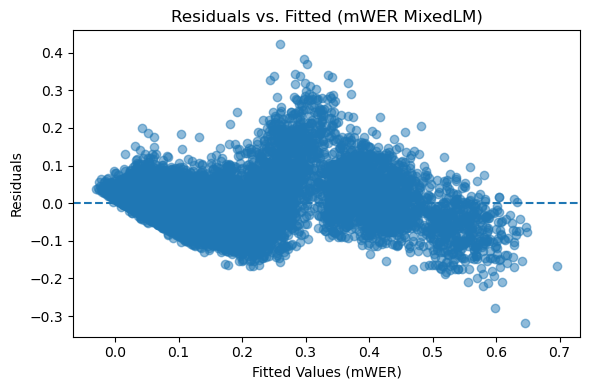

In [3]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

# 1) CSV einlesen
csv_path = os.path.join(os.getcwd(), "transcripts_wer_mwer_phrase.csv")
df = pd.read_csv(csv_path)

# 2) system-Spalte zusammenbauen (falls noch nicht vorhanden)
df['system'] = df['technology'] + "–" + df['model']

# 3) Baseline‑Levels setzen wie im OLS
sys_levels = list(df['system'].unique())
if 'recapp–gsw-CH_smoothed' in sys_levels:
    sys_levels.remove('recapp–gsw-CH_smoothed')
    sys_levels = ['recapp–gsw-CH_smoothed'] + sys_levels
df['system'] = pd.Categorical(df['system'], categories=sys_levels)

av_levels = list(df['ambientVariant'].unique())
if 'trafficOutside' in av_levels:
    av_levels.remove('trafficOutside')
    av_levels = ['trafficOutside'] + av_levels
df['ambientVariant'] = pd.Categorical(df['ambientVariant'], categories=av_levels)

pv_levels = list(df['processedVolume'].unique())
if '-35dBFS' in pv_levels:
    pv_levels.remove('-35dBFS')
    pv_levels = ['-35dBFS'] + pv_levels
df['processedVolume'] = pd.Categorical(df['processedVolume'], categories=pv_levels)

# convoID als Kategorie für den Random Effect
df['convoID'] = df['convoID'].astype('category')

# ----------------------------------------------------------------------------
# 4) Mixed Linear Model auf mWER
# ----------------------------------------------------------------------------
formula = 'mwer ~ C(system) + C(ambientVariant) + C(processedVolume)'
mixed_mwer = smf.mixedlm(formula, data=df, groups=df['convoID'])
mixed_res = mixed_mwer.fit(reml=False)

print("=== mWER Mixed Linear Model ===")
print(mixed_res.summary())

# ----------------------------------------------------------------------------
# 5) Breusch–Pagan‑Test für Heteroskedastizität
# ----------------------------------------------------------------------------
resid = mixed_res.resid
exog = mixed_res.model.exog
_, p_bp, _, _ = het_breuschpagan(resid, exog)
print(f"\nBreusch–Pagan p‑value: {p_bp:.3f}")

# ----------------------------------------------------------------------------
# 6) Residuen‑vs‑Fitted Plot
# ----------------------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.scatter(mixed_res.fittedvalues, resid, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Fitted Values (mWER)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted (mWER MixedLM)")
plt.tight_layout()
plt.show()





In [7]:
# ----------------------------------------------------------------------------
# 7) Ergebnisse exportieren inkl. Variablennamen
# ----------------------------------------------------------------------------
import os
import pandas as pd

# 1) neuen Export-Ordner anlegen
export_dir_mlm = os.path.join(os.getcwd(), "result_paper_mlm")
os.makedirs(export_dir_mlm, exist_ok=True)

# 2) komplettes Summary als Text speichern
with open(os.path.join(export_dir_mlm, "mlm_summary.txt"), "w") as f:
    f.write(mixed_res.summary().as_text())

# 3) Fixed‑Effects‑Tabelle extrahieren
fixed_table = mixed_res.summary().tables[1]

# 4) In DataFrame umwandeln und Variablennamen als Spalte hinzufügen
if isinstance(fixed_table, pd.DataFrame):
    # Hier enthält fixed_table.index schon die Variablennamen
    fixed_df = fixed_table.reset_index().rename(columns={'index': 'variable'})
else:
    # Falls es ein SimpleTable-Objekt ist
    header = fixed_table.data[0]               # List der Spalten­überschriften
    rows = fixed_table.data[1:]                # Je Liste: [variable, coef, stderr, ...]
    fixed_df = pd.DataFrame(rows, columns=header)

# 5) als CSV und Excel speichern (ohne den DataFrame-Index, da wir 'variable' schon haben)
fixed_csv = os.path.join(export_dir_mlm, "mlm_fixed_effects.csv")
fixed_excel = os.path.join(export_dir_mlm, "mlm_fixed_effects.xlsx")

fixed_df.to_csv(fixed_csv, index=False)
fixed_df.to_excel(fixed_excel, index=False)

print(f"Fixed‑Effects inkl. Variablen-Spalte als CSV:  {fixed_csv}")
print(f"Fixed‑Effects inkl. Variablen-Spalte als Excel: {fixed_excel}")
print(f"Komplettes Summary-Textfile:                  {os.path.join(export_dir_mlm, 'mlm_summary.txt')}")



Fixed‑Effects inkl. Variablen-Spalte als CSV:  /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/result_paper_mlm/mlm_fixed_effects.csv
Fixed‑Effects inkl. Variablen-Spalte als Excel: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/result_paper_mlm/mlm_fixed_effects.xlsx
Komplettes Summary-Textfile:                  /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/mwer_statistics/result_paper_mlm/mlm_summary.txt
